# Telecom Customer Churn Project

## Problem Statement

This project focuses on understanding the factors that lead to churn and also build a model which predict maximum numbers of churned customers correctly so that the telecom company can take necessary actions to stop the customer from leaving the network.

In [ ]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [ ]:
# Reading data

data = pd.read_csv("telecom_churn_data.csv")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [ ]:
#List of columns in the dataframe 

list(data)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [ ]:
data.shape

(99999, 226)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [ ]:
# lets have a look at statistical data

data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

### Data Manipulation and Cleaning

In [ ]:
# creating list of columns separated by categories
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

category_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

numeric_cols = [column for column in data.columns if column not in id_cols + date_cols + category_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(numeric_cols), len(category_cols)))

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [ ]:
# checking the percentage of missing values
(data.isnull().mean()*100).sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

### Treating columns with anomalies

In [ ]:
# It is evident that some recharge columns have minimum value of 1
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

data[recharge_cols].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [ ]:
# we can see that the recharge date and the recharge value are missing together which means the customer didn't recharge
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

total_rech_data_6 date_of_last_rech_data_6
1                 NaN                      NaN
2                 NaN                      NaN
3                 NaN                      NaN
5                 NaN                      NaN
6                 NaN                      NaN
7                 NaN                      NaN
8                 NaN                      NaN
9                 NaN                      NaN
10                NaN                      NaN
11                NaN                      NaN

Imputing the NaN values with '0' as missing values cleary says that customer didn't recharge.



In [ ]:
# creating a list of recharge columns where we will impute missing values with zeroes
rech_cols_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [ ]:
# imputing missing values with 0
data[rech_cols_impute] = data[rech_cols_impute].apply(lambda x: x.fillna(0))

In [ ]:
# let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(data[rech_cols_impute].isnull().mean()*100)


Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [ ]:
# dropping id and date columns
print("Shape before dropping: ", data.shape)
data = data.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", data.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


### Replacing NaN values in categorical variables

In [ ]:
# imputing missing values with '-1' in categorical columns
data[category_cols] = data[category_cols].apply(lambda x: x.fillna(-1))

#### Dropping variables with more than a given threshold of missing values

In [ ]:
#deleting columns having more than 70% missing values

drop_cols = [i for i in data.columns if data[i].isna().mean() > 0.7]
data.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
#imputing remaining columns having missing values with 0
data.select_dtypes(exclude  = ['datetime64[ns]', 'category']).fillna(0, inplace = True)


In [ ]:
data.isna().sum()

loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
arpu_6            0
arpu_7            0
                 ..
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
sep_vbc_3g        0
Length: 196, dtype: int64

### Filtering high value customers

For the purpose of filtering high value customers we will first derive some new variables from the data and apply the threshold

In [ ]:
# Creating a new derived variable which will represent total data recharge amount and deleting the columns used to create it
data['total_data_rech_amt_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_amt_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

data.drop(['total_rech_data_6', 'total_rech_data_7','av_rech_amt_data_6', 'av_rech_amt_data_7'], axis = 1, inplace = True)

In [ ]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount 
#and deleting the columns used to create it
data['total_amt_6'] = data.total_rech_amt_6 + data.total_data_rech_amt_6
data['total_amt_7'] = data.total_rech_amt_7 + data.total_data_rech_amt_7

data.drop(['total_rech_amt_6', 'total_rech_amt_7','total_data_rech_amt_6', 'total_data_rech_amt_7'], axis = 1, inplace = True)

In [ ]:
# average recharge done by customer in June and July and deleting the columns used to create it
data['av_amt_6_7'] = (data.total_amt_6 + data.total_amt_7)/2

data.drop(['total_amt_6', 'total_amt_7'], axis = 1, inplace = True)

In [ ]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.av_amt_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 478.0


In [ ]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
data = data.loc[data.av_amt_6_7 > data.av_amt_6_7.quantile(0.7), :]
data = data.reset_index(drop=True)
data.shape

(29953, 191)

In [ ]:
# Creating a new derived variable total revenue from customer for june and july and deleting the columns used to create it
data['total_cust_rev_6_7']=data['arpu_6']+data['arpu_7']

data.drop(['arpu_6', 'arpu_7'], axis = 1, inplace = True)

In [ ]:
# calculate total 3g & 2g internet usage of customer for june and july and deleting the columns used to create it
data['total_3g_vol_6_7']=data['vol_3g_mb_6']+data['vol_3g_mb_7']
data['total_2g_vol_6_7']=data['vol_2g_mb_6']+data['vol_2g_mb_7']

data.drop(['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_2g_mb_6', 'vol_2g_mb_7'], axis = 1, inplace = True)

In [ ]:
# total value based cost for june and july and deleting the columns used to create it
data['vbc_6_7']=data['jun_vbc_3g']+data['jul_vbc_3g']

data.drop(['jun_vbc_3g', 'jul_vbc_3g'], axis = 1, inplace = True)

In [ ]:
data.shape

(29953, 187)

As given in the problem statement we now have ~29.9k values in the data

### Deriving variable churn

Those customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase in the month of september.

In [ ]:
data['churn'] = data.apply(lambda x: 1 if ((x.total_og_mou_9 == 0) & (x.total_ic_mou_9 == 0) & (x.vol_2g_mb_9 == 0) & (x.vol_3g_mb_9 == 0)) else 0, axis = 1)

After tagging churners, we will remove all the attributes corresponding to the churn phase
(all attributes having ‘ _9’ in their names)

In [ ]:
last_month_cols = [i for i in data.columns if i[-1]=='9']
last_month_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [ ]:
data.drop(last_month_cols, axis = 1, inplace = True)

In [ ]:
# changing data type to category
data.churn = data.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(data.churn.value_counts(normalize = True)*100)

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


In [ ]:
#Checking Numerical and Non-Numerical columns

NonNumCols = []
NumCols = []

for col in list(data):
    if data[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
        
print('No of Numerical columns:' ,len(NumCols))
print('No of Non-Numerical columns:', len(NonNumCols))

No of Numerical columns: 141
No of Non-Numerical columns: 0


In [ ]:
data.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_8  \
count         29953.0         29953.0         29953.0  29953.000000   
mean              0.0             0.0             0.0    508.890301   
std               0.0             0.0             0.0    502.136278   
min               0.0             0.0             0.0   -945.808000   
25%               0.0             0.0             0.0    231.615000   
50%               0.0             0.0             0.0    427.604000   
75%               0.0             0.0             0.0    661.753000   
max               0.0             0.0             0.0  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     260.900880    268.051744    234.345252    373.800402    378.233106   
std      459.853278    480.303238    458.751242    482.712621    499.138982   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.090000     16.040000     10.440000     71.610000     69.980000   
50%       84.640000     82.830000     65.660000    222.560000    220.040000   
75%      290.490000    290.540000    240.630000    487.910000    494.030000   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  ...     fb_user_7     fb_user_8           aon  \
count  29953.000000  ...  29953.000000  29953.000000  29953.000000   
mean     335.123008  ...      0.093146      0.009315   1209.280573   
std      481.985106  ...      0.973063      0.972244    957.449442   
min        0.000000  ...     -1.000000     -1.000000    180.000000   
25%       46.760000  ...     -1.000000     -1.000000    460.000000   
50%      182.840000  ...      1.000000      0.000000    846.000000   
75%      438.860000  ...      1.000000      1.000000   1756.000000   
max    14007.340000  ...      1.000000      1.000000   4321.000000   

         aug_vbc_3g    sep_vbc_3g    av_amt_6_7  total_cust_rev_6_7  \
count  29953.000000  29953.000000  29953.000000        29953.000000   
mean     169.276670      8.037804   1153.701715         1119.980605   
std      421.128001     52.413217   1359.533621          860.285908   
min        0.000000      0.000000    478.500000        -1499.566000   
25%        0.000000      0.000000    604.000000          690.996000   
50%        0.000000      0.000000    800.500000          970.625000   
75%      129.130000      0.000000   1209.000000         1349.901000   
max    12916.220000   2618.570000  61236.000000        62876.922000   

       total_3g_vol_6_7  total_2g_vol_6_7       vbc_6_7  
count      29953.000000      29953.000000  29953.000000  
mean         715.208655        251.636399    337.789494  
std         1681.022495        599.738537    785.990828  
min            0.000000          0.000000      0.000000  
25%            0.000000          0.000000      0.000000  
50%            0.000000         12.570000      0.000000  
75%          890.100000        216.210000    316.690000  
max        73335.690000      15878.150000  16381.170000  

[8 rows x 140 columns]

From the data above we can know that there are outliers present in the dataset

### Univariate Analysis

Creating boxplots to check for outliers in numerical columns

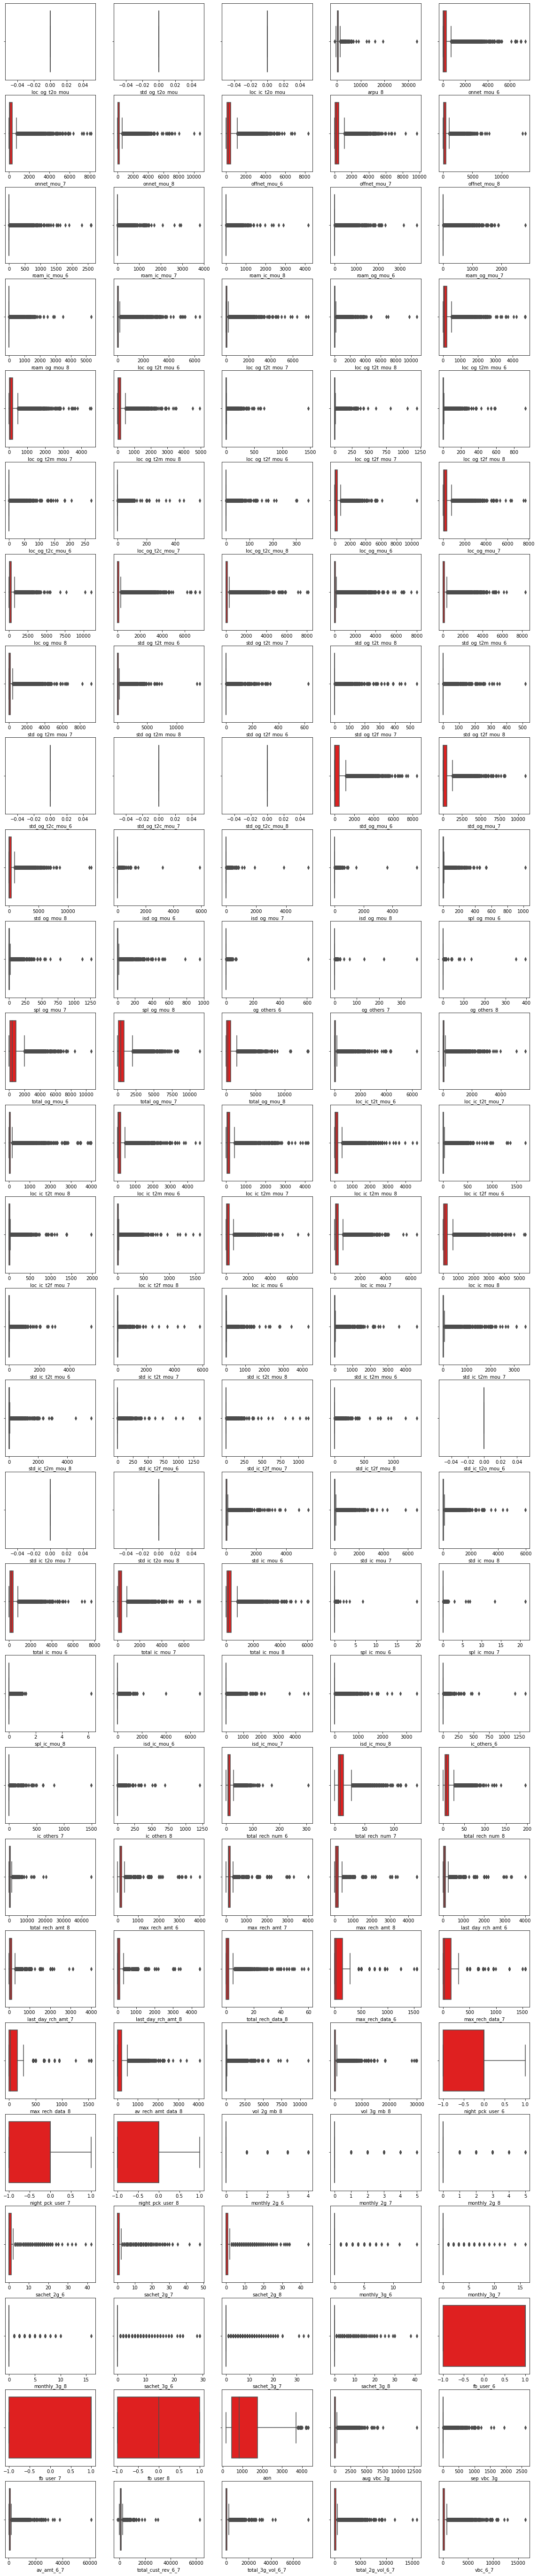

In [ ]:
#creating boxplots of all numerical columns to check for outliers present in each one of them
# Creating subplot axes
fig, axes = plt.subplots(28,5, figsize = (20,100))

# Iterating through axes and names

for name, ax in zip(NumCols, axes.flatten()):
    
    sns.boxplot(name, data=data, orient='v', ax=ax, color = 'r')
   

# axes[7,2].set_axis_off()
# axes[7,3].set_axis_off()

<p>From the above graphs it can be seen that columns like <b> <i>'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8' </i> </b> have all the entries as 0, hence there is no use of keeping these columns in the data.

In [ ]:
zero_cols = data[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
                  'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']]

zero_cols.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  std_og_t2c_mou_6  \
count         29953.0         29953.0         29953.0           29953.0   
mean              0.0             0.0             0.0               0.0   
std               0.0             0.0             0.0               0.0   
min               0.0             0.0             0.0               0.0   
25%               0.0             0.0             0.0               0.0   
50%               0.0             0.0             0.0               0.0   
75%               0.0             0.0             0.0               0.0   
max               0.0             0.0             0.0               0.0   

       std_og_t2c_mou_7  std_og_t2c_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
count           29953.0           29953.0           29953.0           29953.0   
mean                0.0               0.0               0.0               0.0   
std                 0.0               0.0               0.0               0.0   
min                 0.0               0.0               0.0               0.0   
25%                 0.0               0.0               0.0               0.0   
50%                 0.0               0.0               0.0               0.0   
75%                 0.0               0.0               0.0               0.0   
max                 0.0               0.0               0.0               0.0   

       std_ic_t2o_mou_8  
count           29953.0  
mean                0.0  
std                 0.0  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max                 0.0

In [ ]:
data.drop(zero_cols, axis = 1, inplace = True)

<p> It can also be seen that columns like <b><i> 'night_pck_user_6','night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8' </i> </b> have -1, 0, 1 as values which makes no sense hence deleting them.

In [ ]:
negative_val_cols  = data[['night_pck_user_6','night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8' ]]
negative_val_cols.describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8     fb_user_6  \
count      29953.000000      29953.000000      29953.000000  29953.000000   
mean          -0.427536         -0.418656         -0.456615      0.076720   
std            0.521473          0.518104          0.520477      0.976276   
min           -1.000000         -1.000000         -1.000000     -1.000000   
25%           -1.000000         -1.000000         -1.000000     -1.000000   
50%            0.000000          0.000000          0.000000      1.000000   
75%            0.000000          0.000000          0.000000      1.000000   
max            1.000000          1.000000          1.000000      1.000000   

          fb_user_7     fb_user_8  
count  29953.000000  29953.000000  
mean       0.093146      0.009315  
std        0.973063      0.972244  
min       -1.000000     -1.000000  
25%       -1.000000     -1.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [ ]:
data.drop(negative_val_cols, axis = 1, inplace = True)

In [ ]:
data.shape

(29953, 126)

In [ ]:
data.describe()

arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     508.890301    260.900880    268.051744    234.345252    373.800402   
std      502.136278    459.853278    480.303238    458.751242    482.712621   
min     -945.808000      0.000000      0.000000      0.000000      0.000000   
25%      231.615000     17.090000     16.040000     10.440000     71.610000   
50%      427.604000     84.640000     82.830000     65.660000    222.560000   
75%      661.753000    290.490000    290.540000    240.630000    487.910000   
max    33543.624000   7376.710000   8157.780000  10752.560000   8362.360000   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  29953.000000  29953.000000   29953.000000   29953.000000   
mean     378.233106    335.123008      16.124001      12.646145   
std      499.138982    481.985106      76.344227      75.833558   
min        0.000000      0.000000       0.000000       0.000000   
25%       69.980000     46.760000       0.000000       0.000000   
50%      220.040000    182.840000       0.000000       0.000000   
75%      494.030000    438.860000       0.000000       0.000000   
max     9667.130000  14007.340000    2613.310000    3813.290000   

       roam_ic_mou_8  ...   sachet_3g_7   sachet_3g_8           aon  \
count   29953.000000  ...  29953.000000  29953.000000  29953.000000   
mean       12.512269  ...      0.227790      0.202451   1209.280573   
std        74.179181  ...      1.090717      1.100735    957.449442   
min         0.000000  ...      0.000000      0.000000    180.000000   
25%         0.000000  ...      0.000000      0.000000    460.000000   
50%         0.000000  ...      0.000000      0.000000    846.000000   
75%         0.000000  ...      0.000000      0.000000   1756.000000   
max      4169.810000  ...     35.000000     41.000000   4321.000000   

         aug_vbc_3g    sep_vbc_3g    av_amt_6_7  total_cust_rev_6_7  \
count  29953.000000  29953.000000  29953.000000        29953.000000   
mean     169.276670      8.037804   1153.701715         1119.980605   
std      421.128001     52.413217   1359.533621          860.285908   
min        0.000000      0.000000    478.500000        -1499.566000   
25%        0.000000      0.000000    604.000000          690.996000   
50%        0.000000      0.000000    800.500000          970.625000   
75%      129.130000      0.000000   1209.000000         1349.901000   
max    12916.220000   2618.570000  61236.000000        62876.922000   

       total_3g_vol_6_7  total_2g_vol_6_7       vbc_6_7  
count      29953.000000      29953.000000  29953.000000  
mean         715.208655        251.636399    337.789494  
std         1681.022495        599.738537    785.990828  
min            0.000000          0.000000      0.000000  
25%            0.000000          0.000000      0.000000  
50%            0.000000         12.570000      0.000000  
75%          890.100000        216.210000    316.690000  
max        73335.690000      15878.150000  16381.170000  

[8 rows x 125 columns]

In [ ]:
#checking imbalance in target variable
data.churn.value_counts(normalize = True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

In [ ]:
#Splitting the data into X and y variables
y = data['churn'].copy()
X = data.iloc[:, :-1].copy()

### Some more analysis

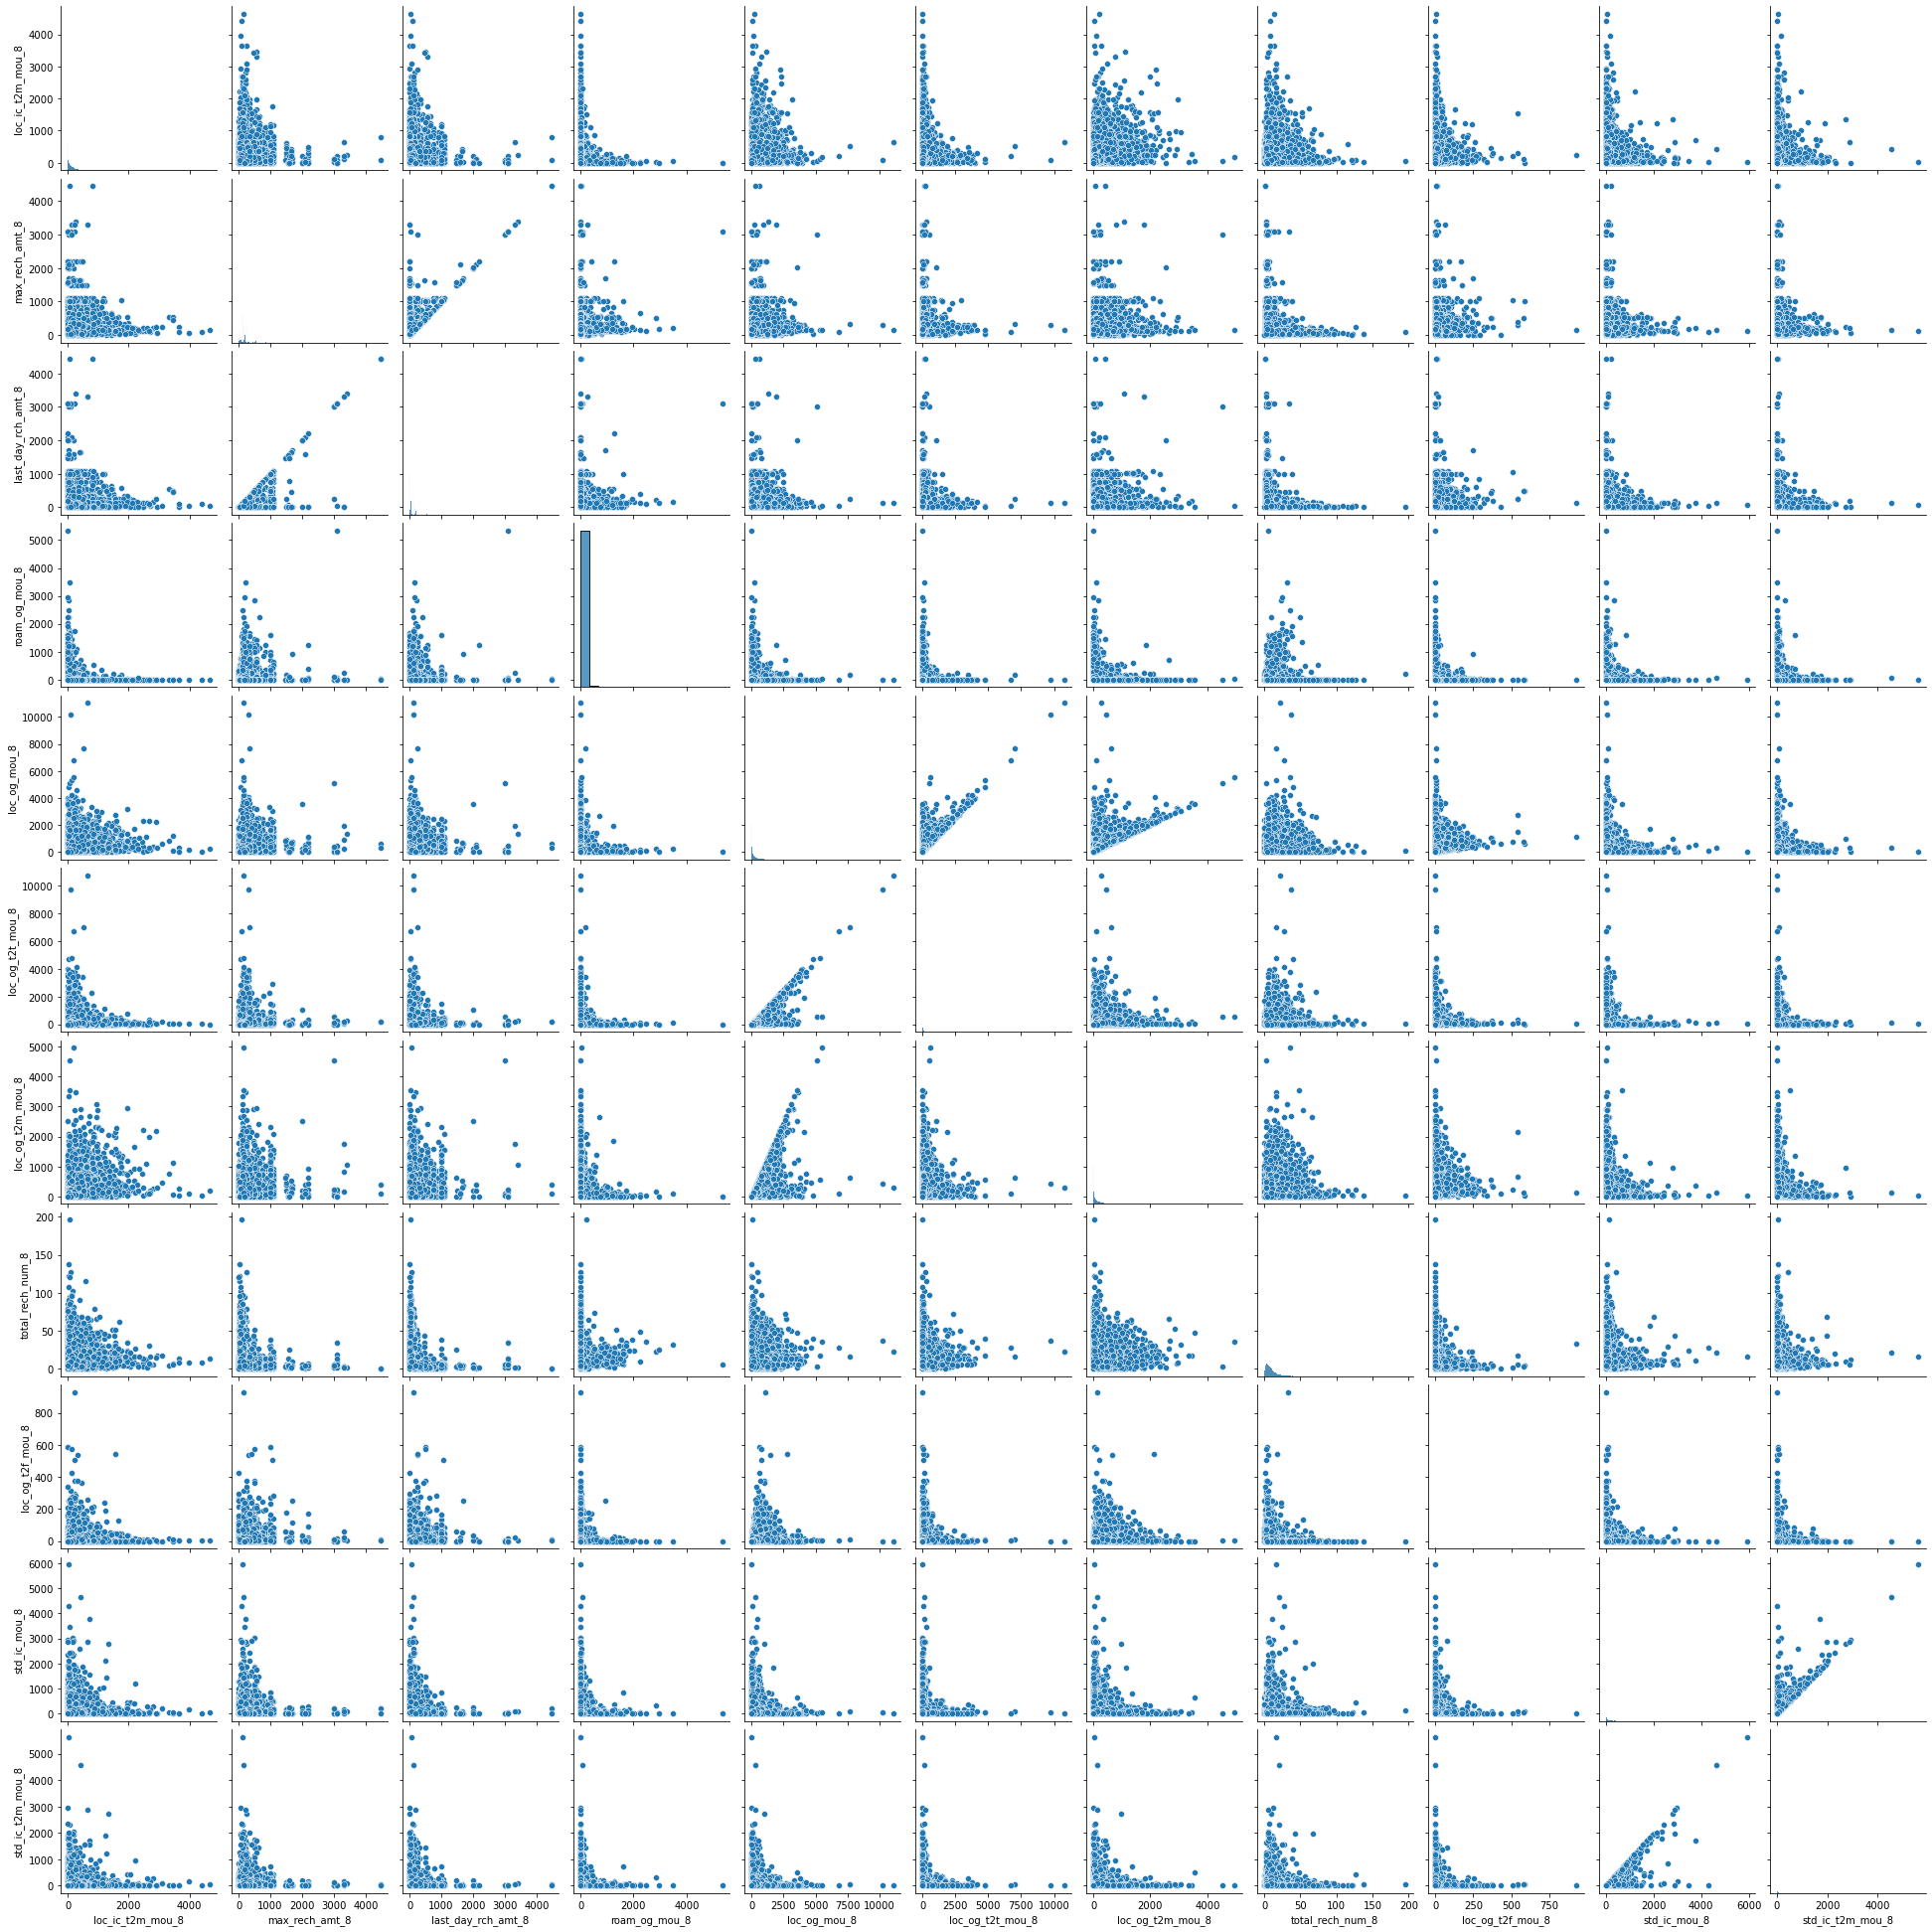

In [ ]:
#some scatter plots of August month columns
sns.pairplot(data=data[['loc_ic_t2m_mou_8','max_rech_amt_8', 'last_day_rch_amt_8',
                        'roam_og_mou_8', 'loc_og_mou_8',
                        'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
                        'total_rech_num_8', 'loc_og_t2f_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8']])
plt.show()

### Key insights achieved from the above curves:

1. Recharge amount is maximum when it reachraged on the last day of the month.
2. Local outgoing minutes of usage is highly correleated within the same operator (mobile to mobile) and other mobile operator. 
3. STD incoming minutes of usage is highly correleated within other mobile operator.

### Applying PCA for dimensionality reduction

In [ ]:
#initialising PCA component
pca = PCA(random_state=42)

In [ ]:
pca.fit(X)

PCA(random_state=42)

In [ ]:
pca.components_

array([[ 3.06216320e-02, -4.57332849e-02, -5.05030966e-02, ...,
         7.38294764e-01,  2.10470077e-02,  2.46151226e-01],
       [ 1.78831745e-01,  1.32700951e-01,  1.55776365e-01, ...,
         7.28572699e-02, -5.01913960e-02,  3.46346902e-03],
       [ 1.47272016e-01, -6.48002605e-02, -7.85197858e-02, ...,
        -1.78511325e-01, -7.34168851e-03, -1.05647006e-02],
       ...,
       [-8.99440623e-08, -1.21662690e-06, -1.90526319e-08, ...,
         2.28331729e-08,  5.59377609e-09,  8.74952002e-10],
       [ 7.06291960e-08, -4.91528046e-07, -9.61747697e-08, ...,
         6.78287497e-09,  7.09477639e-09, -1.44700388e-08],
       [-0.00000000e+00,  9.40675398e-16, -1.61586451e-15, ...,
        -2.38700322e-18, -3.46392589e-18, -7.22735885e-19]])

In [ ]:
pca.explained_variance_ratio_

array([2.86702821e-01, 2.10417985e-01, 8.50297678e-02, 7.04816379e-02,
       5.06341225e-02, 4.48888500e-02, 3.89249533e-02, 3.16278369e-02,
       2.54513904e-02, 2.44337837e-02, 2.22887633e-02, 1.81829513e-02,
       1.49316153e-02, 9.23146851e-03, 7.81581848e-03, 6.04471209e-03,
       5.66513108e-03, 4.46033006e-03, 3.75350794e-03, 3.63320440e-03,
       3.34183091e-03, 3.30686147e-03, 3.17395099e-03, 2.91494536e-03,
       2.65381986e-03, 2.08285579e-03, 1.77341963e-03, 1.58527748e-03,
       1.31690002e-03, 1.20002590e-03, 1.14293544e-03, 9.58179109e-04,
       8.73028224e-04, 8.04560491e-04, 6.51663052e-04, 6.31087740e-04,
       6.25259390e-04, 5.24937147e-04, 5.21379126e-04, 4.85710790e-04,
       4.55303009e-04, 4.06605323e-04, 3.89878239e-04, 3.74316990e-04,
       3.44869851e-04, 3.27793496e-04, 3.10687705e-04, 2.97488015e-04,
       2.32185381e-04, 2.10595329e-04, 1.69967814e-04, 1.59508426e-04,
       1.23689970e-04, 1.21892855e-04, 1.07895278e-04, 1.03670656e-04,
      

<BarContainer object of 125 artists>

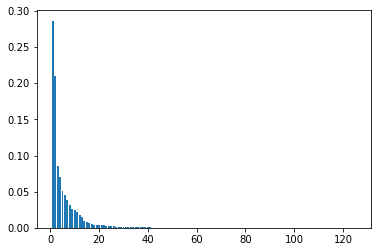

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

From the graph it is visible that almost 15 variables explain the maximum variance in the data

#### Making the scree plot

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

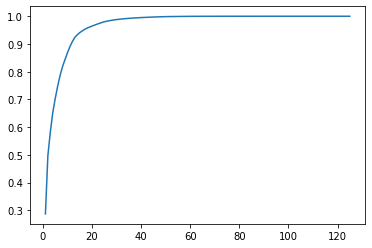

In [ ]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

From the scree plot we will train PCA with 15 components

In [ ]:
pc15 = PCA(n_components=15, random_state=42)

In [ ]:
newdata = pc15.fit_transform(X)

In [ ]:
newdata.shape

(29953, 15)

Making a dataframe out of it for convenience



In [ ]:
df = pd.DataFrame(newdata, columns=['PC'+str(i) for i in range(1,16)])
df.head()

PC1          PC2          PC3         PC4          PC5         PC6  \
0  -428.066786 -1876.061493  -548.242929  215.023056    29.957880 -148.514062   
1  -263.216291  1235.739954  1987.409789  737.744951   713.125189  700.579646   
2   -18.343784  -981.570500  -835.772957   35.000409    -3.543235  685.680454   
3 -1333.117935   982.235088  -692.332307  -57.068922  1223.393084 -358.771213   
4    41.845802 -1450.218855  -472.659018 -182.685729   278.892610  440.452723   

           PC7          PC8         PC9        PC10        PC11        PC12  \
0   274.589265   244.479362 -386.997149   11.568705 -120.134602 -132.334399   
1  2133.446715  2343.204377 -406.134217 -499.399842 -128.586399  467.065749   
2  -177.014964   215.027470  184.998249  550.252985 -648.504163  -29.494878   
3   152.180581  -207.261748 -172.646538 -125.655585  -75.071438  -77.673412   
4   377.344508   -69.836713 -500.746489 -104.022901  548.990755 -375.581441   

         PC13        PC14        PC15  
0   14.154850   73.079673   -6.687167  
1  175.794185  216.662576   25.526105  
2  -67.658523  110.833360  204.705137  
3  172.722712  144.992150  137.133934  
4   89.546590   -1.462984   63.489269

In [ ]:
#adding the target variable to the PCA transformed data
df_final = pd.concat([df, data.iloc[:,-1]], axis=1)

In [ ]:
#creating X and y variables
y = df_final.pop('churn')
X = df_final

In [ ]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, stratify = y, random_state = 42)

As seen earlier that our target variable is highly imbalanced, hence we will apply the SMOTE technique to handle this situation.

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({1: 27520, 0: 27520})


Minimum error:- 0.0 at K = 0


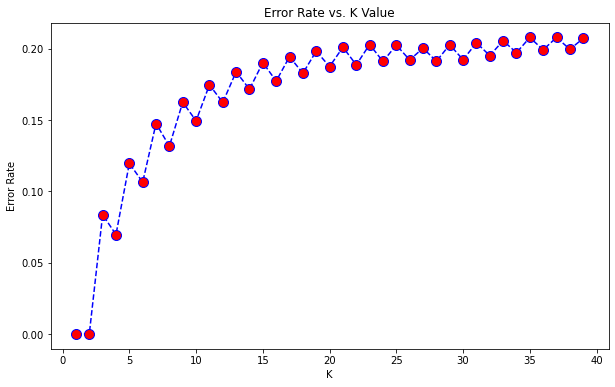

In [ ]:
#creating error v/s neighbours graph to check what number of neghbours are producing least errors
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_res,y_res)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

It can be seen that <b> <i> K=0,1 </i> </b> are producing least error hence we will take K=1

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',metric = 'euclidean' )

In [ ]:
knn.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
#predicting model on train data on which smote transformation was applied
y_res_pred = knn.predict(X_res)

In [ ]:
#classification report
print(classification_report(y_res, y_res_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27520
           1       1.00      1.00      1.00     27520

    accuracy                           1.00     55040
   macro avg       1.00      1.00      1.00     55040
weighted avg       1.00      1.00      1.00     55040



In [ ]:
#predicting model on test data on which smote transformation was not applied
y_test_pred = knn.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6881
           1       1.00      1.00      1.00       608

    accuracy                           1.00      7489
   macro avg       1.00      1.00      1.00      7489
weighted avg       1.00      1.00      1.00      7489



In [ ]:
#creating roc curve
pred_prob1 = knn.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
#auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

1.0


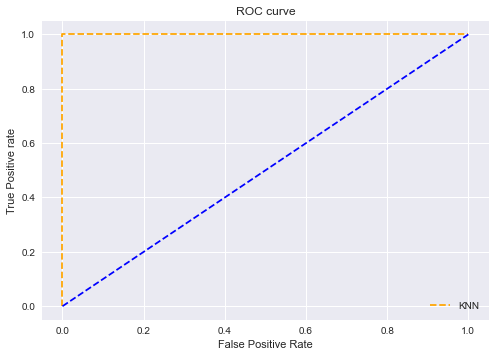

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Applying Random forest for feature importance

In [ ]:
data.shape

(29953, 126)

In [ ]:
data.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [ ]:
#creating X and y variables
y = data['churn'].copy()
X = data.iloc[:, :-1].copy()

In [ ]:
#creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100, stratify  = y)

In [ ]:
X_train.shape, X_test.shape

((22464, 125), (7489, 125))

Since we are using the same dataset and here also class imbalance problem lies, hence we will use SMOTE to handle this

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 27520, 0: 27520})


In [ ]:
#initialising random forest classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# Create the parameter grid for grid search
params = {
    'max_depth': [5, 7,10, 15, 20],
    'min_samples_leaf': [15, 20, 25, 30],
    'max_features': [4,6,10, 14, 20],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
#fitting model on the data on which smote is applied
%%time
grid_search.fit(X_res,y_res)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
CPU times: total: 12min 36s
Wall time: 1h 41min 44s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15, 20],
                         'max_features': [4, 6, 10, 14, 20],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#getting the best random forest
rf_best = grid_search.best_estimator_

In [ ]:
rf_best

RandomForestClassifier(max_depth=20, max_features=14, min_samples_leaf=15,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
#checking model performance on smote transformed data
y_res_pred = rf_best.predict(X_res)

In [ ]:
#classification report
print(classification_report(y_res, y_res_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     27520
           1       0.95      0.97      0.96     27520

    accuracy                           0.96     55040
   macro avg       0.96      0.96      0.96     55040
weighted avg       0.96      0.96      0.96     55040



In [ ]:
#checking model performance on test data on which smote was not applied
y_test_pred = rf_best.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6881
           1       0.61      0.87      0.72       608

    accuracy                           0.94      7489
   macro avg       0.80      0.91      0.84      7489
weighted avg       0.96      0.94      0.95      7489



In [ ]:
#getting one sample tree from the fitted random forest
sample_tree = rf_best.estimators_[0]

In [ ]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.463033 to fit



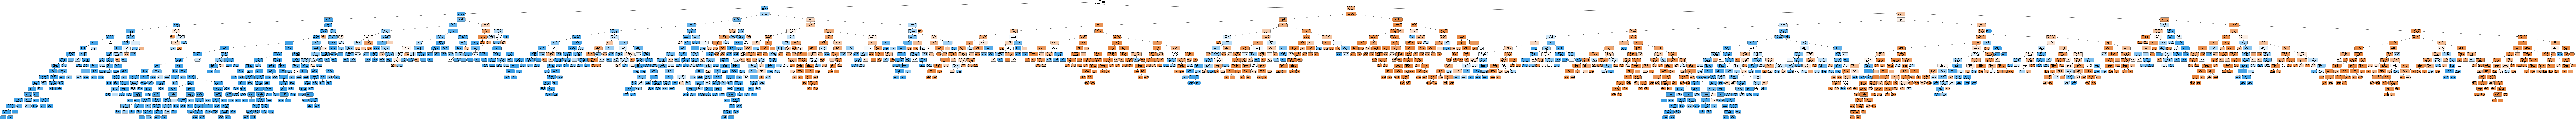

In [ ]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns, 
                    class_names=["Churn", "Not Churn"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
#getting top 10 important features
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)[:10]

Varname       Imp
63        loc_ic_mou_8  0.082191
78      total_ic_mou_8  0.072303
12       roam_og_mou_8  0.063956
9        roam_ic_mou_8  0.063481
57    loc_ic_t2m_mou_8  0.058012
91    total_rech_amt_8  0.047070
98   total_rech_data_8  0.044847
27        loc_og_mou_8  0.036916
97  last_day_rch_amt_8  0.032500
0               arpu_8  0.030849

The top 10 important features are all of August month columns and it is fairly reasonable as that was the month where customers actually started to churn.